**Question # 02: Use any datasets from Kaggle competition not earlier than 2020, compare and analyze the performance of decision trees on that dataset (with different hyper-parameter tuning) using F-measure and Accuracy. Plot performance curves and discuss. Use 10 Fold Cross Validation and random train/test split (70%, 30%).**

Dataset Link: https://www.kaggle.com/code/mariyamalshatta/heart-attack-risk-analysis-competition/input

In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Loading Dataset
data = pd.read_csv('/content/Dataset.csv')

In [3]:
# Displaying top 5 rows
data.head (5)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [4]:
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

data['Systolic'] = data['Systolic'].astype(float)
data['Diastolic'] = data['Diastolic'].astype(float)

data.drop('Blood Pressure', axis=1, inplace=True)

In [5]:
data.head(5)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,RDG0550,33,Male,200,48,0,1,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129.0,90.0
1,NMA3851,56,Female,262,46,1,0,1,0,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159.0,105.0
2,TUI5807,19,Female,140,54,0,1,0,0,1,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161.0,109.0
3,YYT5016,50,Female,163,53,0,1,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120.0,62.0
4,ZAC5937,89,Female,144,92,1,0,1,0,1,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153.0,110.0


In [6]:
# Defining feature columns and target variable
features = ['Age', 'Sex', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'Diabetes', 'Family History',
            'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
            'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
            'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
            'Country', 'Continent', 'Hemisphere']
target = 'Heart Attack Risk'

In [7]:
X = data[features]
y = data[target]

In [8]:
# # Encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Diabetes', 'Diet', 'Country', 'Continent', 'Hemisphere'])

In [9]:
# Spliting the dataset into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Initializing lists to store results
f1_scores = []
accuracy_scores = []

In [11]:
# Defining a range of hyperparameters to tune
max_depth_range = range(1, 11)
min_samples_split_range = range(2, 11)

In [12]:
# Iterating through different hyperparameter settings
for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

        f1_scores_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
        accuracy_scores_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

        f1_mean = np.mean(f1_scores_cv)
        accuracy_mean = np.mean(accuracy_scores_cv)

        f1_scores.append(f1_mean)
        accuracy_scores.append(accuracy_mean)

In [13]:
# Reshaping the results for plotting
f1_scores = np.array(f1_scores).reshape(len(max_depth_range), len(min_samples_split_range))
accuracy_scores = np.array(accuracy_scores).reshape(len(max_depth_range), len(min_samples_split_range))

In [14]:
# Plot performance curves for F1 and Accuracy
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

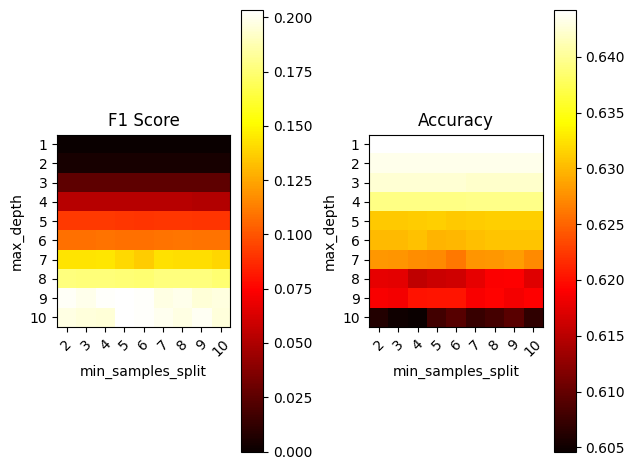

In [20]:
plt.subplot(1, 2, 1)
plt.imshow(f1_scores, interpolation='nearest', cmap=plt.cm.hot)
plt.title("F1 Score")
plt.colorbar()
plt.xticks(np.arange(len(min_samples_split_range)), min_samples_split_range, rotation=45)
plt.yticks(np.arange(len(max_depth_range)), max_depth_range)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")

plt.subplot(1, 2, 2)
plt.imshow(accuracy_scores, interpolation='nearest', cmap=plt.cm.hot)
plt.title("Accuracy")
plt.colorbar()
plt.xticks(np.arange(len(min_samples_split_range)), min_samples_split_range, rotation=45)
plt.yticks(np.arange(len(max_depth_range)), max_depth_range)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")

plt.tight_layout()
plt.show()

Each pixel in the image corresponds to a specific combination of max_depth and min_samples_split for the decision tree model.

The x-axis of the image represents different values of min_samples_split.
The y-axis of the image represents different values of max_depth.

**F1 Score**
The color of each pixel indicates the F1 score obtained for the corresponding hyperparameter combination.
Dark pixels represent lower F1 scores, and bright pixels represent higher F1 scores.

**Accuracy**
The color of each pixel indicates the accuracy obtained for the corresponding hyperparameter combination.
Dark pixels represent lower accuracy, and bright pixels represent higher accuracy.

These visualizations help to choose the optimal combination of hyperparameters for decision tree model. Bright spots in both visualizations, indicating the hyperparameter values that result in the best trade-off between accuracy and F1 score.

In [21]:
# Selecting the best hyperparameters based on the maximum F1 score
best_f1_index = np.unravel_index(np.argmax(f1_scores), f1_scores.shape)
best_max_depth = max_depth_range[best_f1_index[0]]
best_min_samples_split = min_samples_split_range[best_f1_index[1]]

In [22]:
# Creating a Decision Tree Classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

In [23]:
# Training the model on the training data
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=5, random_state=42)

In [24]:
# Making predictions on the test data
y_pred = best_clf.predict(X_test)

In [25]:
# Evaluate the model's performance on the test set
f1_test = f1_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)

In [26]:
print("Selected Hyperparameters:")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")

Selected Hyperparameters:
Best max_depth: 9
Best min_samples_split: 5


In [27]:
print("\nTest Set Performance:")
print(f"F1 Score on Test Set: {f1_test:.2f}")
print(f"Accuracy on Test Set: {accuracy_test:.2f}")


Test Set Performance:
F1 Score on Test Set: 0.22
Accuracy on Test Set: 0.61
